<a href="https://colab.research.google.com/github/vcu-swim-lab/digital-forensics-data-science-tutorials/blob/main/Analyzing_Chat_Log_Data_Sets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="color:saddlebrown;"><center>Analyzing Chat Log Data Sets For Digital Forensics Using Data Science</center></h1>


<br>
<h2 style="color:peru;"><center><u>[Background Information]</u></center></h2>

<p><center>Digital Forensics is a science that focuses on identifying, gathering, processing, analysing, and 
reporting of data stored electronically. <blockquote style="color:burlywood;">Computer emails, text messages, images, documents, and internet histories 
are all viable for digital forensic analysis.</blockquote>
 
An analyst will have to examine data from a user or suspect and try and preserve the 
evidence in its most original form. <blockquote style="color:burlywood;">Any alarming piece of information from these computer files can be used 
as evidence. </blockquote>

Usually, the unfiltered data will be received in bulk with a lot harmless filler, resulting in a tasking file size. As a result, to comb the data manually would be grueling and time consuming. This is where the utilization of data science and machine learning comes into play. Chat logs are a great example of this, and one of the most common evidence formats you will come across. <blockquote style="color:burlywood;"> You may have to read through 
their messages to see their conversation, who their communicating with, potential partners, or other key 
pieces of evidence. Chat logs can be a key piece to the criminal profile puzzle.</blockquote> </center></p>

<h2 style="color:darkolivegreen;"><center><u>[What We Will Be Doing]</u></center></h2>

<p><center>We will be giving you some tips on how exactly we can condense, filter and organize chat logs to a more time efficient and investigation worthy format. We will be explaining how to organize the data in a better fashion, 
remove duplications, scrub bad or useless data, and more. For this example we will be viewing a public Discord server, consiting of four different programming communities; Python, Go, Clojure, and Racket.<blockquote style="color:darkkhaki;"> This server's purpose is to be a hub for getting technical help, sharing knowledge, and a sense of community.</blockquote></center></p>

<h2 style="color:darkcyan;"><center><u>[Learning Goals]</u></center></h2>

<ul style="text-align:center;list-style-position:inside">
    <li>Use Pandas to manipulate a data set</li>
    <li>Cleaning data</li>
    <li>Analyze/sort through the data set</li>
    <li>Pull specific details from the data set</li>
    <li>Convert information into visual graphs</li>
</ul>







 <h2 style="color:mediumpurple;"><center><u>[Acquiring the Discord Datasets]</u></center></h2>

<p><center>This demonstration is based off of Preetha Chatterjee and her team of engineers' research, DISCO: A Dataset of Discord Chat Conversations for Software Engineering Research. 

<blockquote style="color:thistle;">Download the dataset here <a href="https://zenodo.org/record/5909202#.Y91yPnbMKUk">[Link]</a>.</blockquote></center></p>

<h2 style="color:mediumblue;"><center><u>[Getting Started]</u></center></h2>

<p><center>To first get started, we will import some helpful libraries that will make the data set processing easier.

</center></p>
<p><center><b>Here are the links to the library download:</b></center></p>

<dl style="text-align:center;list-style-position:inside">
    <dt><a href="https://pandas.pydata.org/">[Pandas]</a></dt>
<dd style="color:cadetblue;">is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language.</dd>  
<dt><a href="https://numpy.org/">[Numpy]</a></dt>
<dd style="color:cadetblue;">is the fundamental package for scientific computing with Python</dd>
<dt><a href="https://matplotlib.org/stable/index.html">[Matplotlib]</a></dt> <dd style="color:cadetblue;">is a comprehensive library for creating static, animated, and interactive visualizations in Python.</dd>
<dt><a href="https://docs.python.org/3/library/datetime.html#module-datetime">[Datetime]</a></dt>
<dd style="color:cadetblue;">module supplies classes for manipulating dates and times.</dd>
<dt><a href="https://www.marktechpost.com/2019/06/07/how-to-connect-google-colab-with-google-drive/">[Drive]</a></dt>
<dd style="color:cadetblue;">is used to connect your Google Drive to this Google Colab file</dd>
</dl>


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


<h2 style="color:saddlebrown;"><center><u>[Loading the data set]</u></center></h2>

<p><center><b>Now we must load in the dataset. For this tutorial we will be using chat logs in the Python server from December 2019.</b>

<blockquote style="color:cadetblue;">
**The file is called (pythongeneralDec2019.xml).**
</blockquote>
</center></p>


<p><center><b>We will access our data set using the pandas library we imported.</b>

   <blockquote style="color:cadetblue;"> We are going to be storing our data set of chat logs into a variable called "df" and will use the 'pandas' library to read the xml file.</blockquote></center></p>

<p><center><b>There are a few ways to insert the dataset file.</b></center></p>

<h3 style="color:peru;"><center><u>> Option 1 - Recommended</u></center></h3>
<p><center>One way, which allows for a one time load in, is storing it in google drive.

<blockquote style="color:burlywood;">Either in google drive or in the files section on the left hand side of this Google Colab page, upload the month of chat logs we will be experimenting with **(pythongeneralDec2019.xml)** into "content" then "drive" folder. </blockquote></center></p>

<p><center>Then you can use the following command:</center></p>

In [ ]:
df = pd.read_xml('/content/drive/MyDrive/pythongeneralDec2019.xml')

<h3 style="color:peru;"><center><u>> Option 2</u></center></h3>

<p><center>Another way is to directly upload the file in the files section on the left hand side of this Google Colab page.

<blockquote style="color:burlywood;">You must insert the file in the "content" folder. The only issue with this way is that you will need to upload the file everytime we run.</blockquote></center></p>

<p><center>Then you can use the following code to load in the file into our workspace:</center></p>

In [ ]:
#df = pd.read_xml('pythongeneralDec2019.xml')

<h2 style="color:brown;"><center><u>[Reading the dataset]</u></center></h2>

<p><center>Now that we have our file, lets take a look at what our data consists of using the "info" method. </center></p>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30944 entries, 0 to 30943
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   team_domain   1 non-null      object
 1   channel_name  1 non-null      object
 2   start_date    1 non-null      object
 3   end_date      1 non-null      object
 4   ts            30940 non-null  object
 5   user          30940 non-null  object
 6   text          30940 non-null  object
dtypes: object(7)
memory usage: 1.7+ MB


<p><center>Here we can see a more general view of what our data set consists of. This shows our different column names as well as how many values are in these columns. Notice the first four columns, there is only one piece of data in these columns.</center></p>

<blockquote style="color:burlywood;">Using just the "df" command, now we see exactly what our data in the data set consists of as a whole.</blockquote>

In [ ]:
df

,team_domain,channel_name,start_date,end_date,ts,user,text
0,Python,None,None,None,None,None,None
1,None,python-general,None,None,None,None,None
2,None,None,2019-12-01T00:56:23.288000,None,None,None,None
3,None,None,None,2019-12-31T18:29:57.380000,None,None,None
4,None,None,None,None,2019-12-01T00:56:23.288000,Ryden,where is the name of the file stored on the file?
...,...,...,...,...,...,...,...
30939,None,None,None,None,2019-12-31T18:24:58.198000,Azyriah,hi @GokturkSM
30940,None,None,None,None,2019-12-31T18:25:37.421000,Areesha,Anyone have some math background? Trying to im...
30941,None,None,None,None,2019-12-31T18:26:17.603000,Areesha,My question is... what exactly is a cyclic gro...
30942,None,None,None,None,2019-12-31T18:29:15.676000,Ailany,You need to know what exceptions your code may...


<h2 style="color:darkolivegreen;"><center><u>[Data cleaning]</u></center></h2>

<p><center>Notice the first four columns again, we only have one piece of information in each of these columns, and they aren't that useful to us. We do not need to work with the name of the discord channel as well as the start and end date/time. </center></p>

<blockquote style="color:darkkhaki;">We will start by getting rid of these first four columns and rows of data to simplify and condense down our data set.</blockquote>

<p><center>Let's use the "drop" method to get rid of our first four rows of data. Then, let's take a look at what it looks like.</center></p>

In [ ]:
df = df.drop(range(0,4))

df

,team_domain,channel_name,start_date,end_date,ts,user,text
4,None,None,None,None,2019-12-01T00:56:23.288000,Ryden,where is the name of the file stored on the file?
5,None,None,None,None,2019-12-01T01:07:04.875000,Jayvien,say what?
6,None,None,None,None,2019-12-01T01:10:54.022000,Kaliope,Where would you guys recommend I learn kotlin ...
7,None,None,None,None,2019-12-01T01:13:29.732000,Naely,I used the official Kotlin docs they have an e...
8,None,None,None,None,2019-12-01T01:16:43.656000,Jayvien,do they?
...,...,...,...,...,...,...,...
30939,None,None,None,None,2019-12-31T18:24:58.198000,Azyriah,hi @GokturkSM
30940,None,None,None,None,2019-12-31T18:25:37.421000,Areesha,Anyone have some math background? Trying to im...
30941,None,None,None,None,2019-12-31T18:26:17.603000,Areesha,My question is... what exactly is a cyclic gro...
30942,None,None,None,None,2019-12-31T18:29:15.676000,Ailany,You need to know what exceptions your code may...


<br>
<p><center>Our data set looks a little cleaner now. However, now we have four rows full of empty or null data.</center></p>

<blockquote style="color:darkkhaki;">Lets now get rid of these first four columns to condense our table down into a more readable table.</blockquote>

<p><center>We will use the same "drop" method but we will specify what columns exactly we want to drop as well as use "axis=1" to specify we want to drop a column instead of a rows.</center></p>

In [ ]:
df = df.drop(labels="team_domain", axis=1)

df

,channel_name,start_date,end_date,ts,user,text
4,None,None,None,2019-12-01T00:56:23.288000,Ryden,where is the name of the file stored on the file?
5,None,None,None,2019-12-01T01:07:04.875000,Jayvien,say what?
6,None,None,None,2019-12-01T01:10:54.022000,Kaliope,Where would you guys recommend I learn kotlin ...
7,None,None,None,2019-12-01T01:13:29.732000,Naely,I used the official Kotlin docs they have an e...
8,None,None,None,2019-12-01T01:16:43.656000,Jayvien,do they?
...,...,...,...,...,...,...
30939,None,None,None,2019-12-31T18:24:58.198000,Azyriah,hi @GokturkSM
30940,None,None,None,2019-12-31T18:25:37.421000,Areesha,Anyone have some math background? Trying to im...
30941,None,None,None,2019-12-31T18:26:17.603000,Areesha,My question is... what exactly is a cyclic gro...
30942,None,None,None,2019-12-31T18:29:15.676000,Ailany,You need to know what exceptions your code may...


<br>
<p><center>As you can see we dropped the "team_domain" column successfully.</center></p>

<blockquote style="color:darkkhaki;">Lets get rid of the last three empty columns then take a look at how our data set table looks.</blockquote>

In [ ]:
df = df.drop(labels="channel_name", axis=1)
df = df.drop(labels="start_date", axis=1)
df = df.drop(labels="end_date", axis=1)

df

,ts,user,text
4,2019-12-01T00:56:23.288000,Ryden,where is the name of the file stored on the file?
5,2019-12-01T01:07:04.875000,Jayvien,say what?
6,2019-12-01T01:10:54.022000,Kaliope,Where would you guys recommend I learn kotlin ...
7,2019-12-01T01:13:29.732000,Naely,I used the official Kotlin docs they have an e...
8,2019-12-01T01:16:43.656000,Jayvien,do they?
...,...,...,...
30939,2019-12-31T18:24:58.198000,Azyriah,hi @GokturkSM
30940,2019-12-31T18:25:37.421000,Areesha,Anyone have some math background? Trying to im...
30941,2019-12-31T18:26:17.603000,Areesha,My question is... what exactly is a cyclic gro...
30942,2019-12-31T18:29:15.676000,Ailany,You need to know what exceptions your code may...


<h2 style="color:indigo;"><center><u>[Formatting]</u></center></h2>

<p><center>Our table looks much cleaner now, we consolidated the data down into data we want to actually look at.</center></p>

<blockquote style="color:mediumpurple;">Lets next rename the 'ts' column into 'time' just to better clarify. We will use the "rename" method to do so.</blockquote>

In [ ]:
df.rename(columns = {'ts':'time'}, inplace = True)

df

,time,user,text
4,2019-12-01T00:56:23.288000,Ryden,where is the name of the file stored on the file?
5,2019-12-01T01:07:04.875000,Jayvien,say what?
6,2019-12-01T01:10:54.022000,Kaliope,Where would you guys recommend I learn kotlin ...
7,2019-12-01T01:13:29.732000,Naely,I used the official Kotlin docs they have an e...
8,2019-12-01T01:16:43.656000,Jayvien,do they?
...,...,...,...
30939,2019-12-31T18:24:58.198000,Azyriah,hi @GokturkSM
30940,2019-12-31T18:25:37.421000,Areesha,Anyone have some math background? Trying to im...
30941,2019-12-31T18:26:17.603000,Areesha,My question is... what exactly is a cyclic gro...
30942,2019-12-31T18:29:15.676000,Ailany,You need to know what exceptions your code may...


<br>
<p><center>Our table is now more simpiler to look at. However if you take a look at the time column, with the format, it is very hard to read what it says.</center></p>

<blockquote style="color:mediumpurple;">Let's now re-format this column to be able to read the time each message was sent.</blockquote>

<p><center>We will use the 'pandas' library once again as well as the "to_datetime" method to re-format this column in a more readable way.</center></p>

In [ ]:
df['time'] = pd.to_datetime(df['time'], format="%Y-%m-%d")

df

,time,user,text
4,2019-12-01 00:56:23.288,Ryden,where is the name of the file stored on the file?
5,2019-12-01 01:07:04.875,Jayvien,say what?
6,2019-12-01 01:10:54.022,Kaliope,Where would you guys recommend I learn kotlin ...
7,2019-12-01 01:13:29.732,Naely,I used the official Kotlin docs they have an e...
8,2019-12-01 01:16:43.656,Jayvien,do they?
...,...,...,...
30939,2019-12-31 18:24:58.198,Azyriah,hi @GokturkSM
30940,2019-12-31 18:25:37.421,Areesha,Anyone have some math background? Trying to im...
30941,2019-12-31 18:26:17.603,Areesha,My question is... what exactly is a cyclic gro...
30942,2019-12-31 18:29:15.676,Ailany,You need to know what exceptions your code may...


<br><br><p><center><b>Additionally, we can add in the day of the week each messages was sent.</b></center></p>



In [ ]:
df['day'] = df['time'].dt.day_name()

df

,time,user,text,day
4,2019-12-01 00:56:23.288,Ryden,where is the name of the file stored on the file?,Sunday
5,2019-12-01 01:07:04.875,Jayvien,say what?,Sunday
6,2019-12-01 01:10:54.022,Kaliope,Where would you guys recommend I learn kotlin ...,Sunday
7,2019-12-01 01:13:29.732,Naely,I used the official Kotlin docs they have an e...,Sunday
8,2019-12-01 01:16:43.656,Jayvien,do they?,Sunday
...,...,...,...,...
30939,2019-12-31 18:24:58.198,Azyriah,hi @GokturkSM,Tuesday
30940,2019-12-31 18:25:37.421,Areesha,Anyone have some math background? Trying to im...,Tuesday
30941,2019-12-31 18:26:17.603,Areesha,My question is... what exactly is a cyclic gro...,Tuesday
30942,2019-12-31 18:29:15.676,Ailany,You need to know what exceptions your code may...,Tuesday


<p><center>Now let's fix the time for when each message was sent as it looks very messy at the moment.</center></p>

<blockquote style="color:mediumpurple;">First, we can re-format the 'time' column and convert the time to just include the hour and minute. This way it's a little more readable and not as cluttered as before.</blockquote>

In [ ]:
df['time'] = pd.to_datetime(df['time'], dayfirst=True).dt.strftime("%Y-%m-%d %H:%M")

df

,time,user,text,day
4,2019-12-01 00:56,Ryden,where is the name of the file stored on the file?,Sunday
5,2019-12-01 01:07,Jayvien,say what?,Sunday
6,2019-12-01 01:10,Kaliope,Where would you guys recommend I learn kotlin ...,Sunday
7,2019-12-01 01:13,Naely,I used the official Kotlin docs they have an e...,Sunday
8,2019-12-01 01:16,Jayvien,do they?,Sunday
...,...,...,...,...
30939,2019-12-31 18:24,Azyriah,hi @GokturkSM,Tuesday
30940,2019-12-31 18:25,Areesha,Anyone have some math background? Trying to im...,Tuesday
30941,2019-12-31 18:26,Areesha,My question is... what exactly is a cyclic gro...,Tuesday
30942,2019-12-31 18:29,Ailany,You need to know what exceptions your code may...,Tuesday


<p><center>Next, we can split the "time" column because it's still difficult to read. </center></p>

<blockquote style="color:mediumpurple;">Lets split this column into two columns. We can have one column for the "date" and another column for the "time". This way we can distinguish the numbers better.</blockquote>

<p><center>Let's create two columns called "date" & "time". We just have to apply the 'split' method to our current "time" column, where we can split by the space in-between the date and the time of when each message was sent.</center></p>                    

In [ ]:
df[['date', 'time']] = df["time"].apply(lambda x: pd.Series(str(x).split(" ")))

df

,time,user,text,day,date
4,00:56,Ryden,where is the name of the file stored on the file?,Sunday,2019-12-01
5,01:07,Jayvien,say what?,Sunday,2019-12-01
6,01:10,Kaliope,Where would you guys recommend I learn kotlin ...,Sunday,2019-12-01
7,01:13,Naely,I used the official Kotlin docs they have an e...,Sunday,2019-12-01
8,01:16,Jayvien,do they?,Sunday,2019-12-01
...,...,...,...,...,...
30939,18:24,Azyriah,hi @GokturkSM,Tuesday,2019-12-31
30940,18:25,Areesha,Anyone have some math background? Trying to im...,Tuesday,2019-12-31
30941,18:26,Areesha,My question is... what exactly is a cyclic gro...,Tuesday,2019-12-31
30942,18:29,Ailany,You need to know what exceptions your code may...,Tuesday,2019-12-31


<br><p><center>Now we can read the date and time each message was sent in a much more readable view.</center></p>

<p><center>One last thing we can do to better format our table is to change the order of the columns.</center></p>

<blockquote style="color:mediumpurple;">For this example, lets format it to: date | time | day | user | text.</blockquote>

In [ ]:
df = df[['date','time', 'day', 'user', 'text']]

df

,date,time,day,user,text
4,2019-12-01,00:56,Sunday,Ryden,where is the name of the file stored on the file?
5,2019-12-01,01:07,Sunday,Jayvien,say what?
6,2019-12-01,01:10,Sunday,Kaliope,Where would you guys recommend I learn kotlin ...
7,2019-12-01,01:13,Sunday,Naely,I used the official Kotlin docs they have an e...
8,2019-12-01,01:16,Sunday,Jayvien,do they?
...,...,...,...,...,...
30939,2019-12-31,18:24,Tuesday,Azyriah,hi @GokturkSM
30940,2019-12-31,18:25,Tuesday,Areesha,Anyone have some math background? Trying to im...
30941,2019-12-31,18:26,Tuesday,Areesha,My question is... what exactly is a cyclic gro...
30942,2019-12-31,18:29,Tuesday,Ailany,You need to know what exceptions your code may...


<p><center>Great! Our table of data looks much more organized now.</center></p>
<blockquote style="color:mediumpurple;">Finally, we can start analyzing some of these messages.</blockquote>

<h2 style="color:darkcyan;"><center><u>[Analysis]</u></center></h2>

<p><center>Since our data frame is now more organized and cleaned up, we can start analyzing some of the data stored.</center></p>

<blockquote style="color:cadetblue;">Lets take a look at how much data in our columns there is to go through by using the "count" method.</blockquote>

In [ ]:
df.count()

date    30940
time    30940
day     30940
user    30940
text    30940
dtype: int64

<h2 style="color:darkolivegreen;"><center><u>[Text Analysis]</u></center></h2>

<p><center>The result shows that we have 30,940 different text messages in this data set, which is a lot to manually look through.</center></p>

<blockquote style="color:darkkhaki;">We can analyze this information in a much easier way by using code. Lets first take a look at the "user" column.</blockquote>

<p><center>We can count how many messages each user has sent by incorporating the "groupby" method along with the "count" method.</center></p>

In [ ]:
df.groupby(['user'])['user'].count()

user
Aashvi         17
Abbott         37
Abdalahe        6
Abdelfetah      5
Abdelmadjid    76
               ..
Zuma            1
Zurisadai       4
Zuriya         25
Zviad           1
Zyanna          5
Name: user, Length: 828, dtype: int64

<p><center>With this table, we can see each user and how many messages they have sent in the Discord.</center></p>

<blockquote style="color:darkkhaki;">This can be important to us in Digitital Forensic use because now we can distinguish the user and their messages they sent. If we find something alarming by one user and their message, we can then look at their other messages to potentially find other information about them.</blockquote>

<p><center>Let's start analyzing the table and find which user has sent the most messages in total.</center></p>

<p><center>We can add on the "max" method to our code and it will return the maximum value of messages sent for one user.</center></p>

In [ ]:
df.groupby(['user'])['user'].count().max()

2626

<p><center>So we can see the user with the highest amount of messages has sent "2626" messages in this data set.</center></p>

<blockquote style="color:darkkhaki;">Lets find out who sent these messages.</blockquote>

<p><center>We will use the "value_counts" method along with the "idxmax" method to go through each row in the 'user' column and count which index has the max or highest value.</center></p>

In [ ]:
df['user'].value_counts().idxmax()

'Xochilt'

<p><center>This shows us the user who sent the most messages in the data set.</center></p>

<blockquote>Lets also look at the other top users who has sent the most messages.</blockquote>

<p><center>We will use the "head" method which return the top five users unless specified otherwise.</center></p>

In [ ]:
df['user'].value_counts().head()

Xochilt     2626
Kosta       1280
Naely       1067
Adirah       845
Andersyn     662
Name: user, dtype: int64

<p><center>Seems like "Xochilt" has sent a lot of messages! He must have been a big help in the Discord.</center></p>

<blockquote style= "color:darkkhaki";>If we have someone we want to analyze more specifically, we can also specify which user we want to take a look at. We can then find how many messages they sent, and more.</blockquote>

<p><center>Lets find out how many messages "Ryden" sent for example.</center></p>

In [ ]:
df['user'].value_counts()['Ryden']

113

<h3 style="color:darkolivegreen;"><center><u>[Emotion Detection]</u></center></h3>

<p><center>Let's look into emotion detection based on the chat log messages.</center></p>

<p><center>We can use the library <a href="https://textblob.readthedocs.io/en/dev/">[TextBlob]</a> which is a text processing tool.</center></p>
<blockquote style="color:darkkhaki";>It has a variety of uses, but for our purpose we will focus on the 'polarity' feature.</blockquote>
<p><center>This will analyze any text we give it, and give a polarity rank from -1 to 1. Negative polarity indicates negative emotions with -1 as mostly negative and vice versa.</center></p> 

<p><center>The first step is to import and download the necessary packages.</center></p>

In [ ]:
from textblob import TextBlob
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('brown')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

In [ ]:
df['polarity_score'] = ""
for i in df.index:
  blob_text = TextBlob(df['text'][i])
  polarity = blob_text.sentiment.polarity 
  df['polarity_score'][i] = polarity

df

<ipython-input-22-7d5751c3be9c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['polarity_score'] = ""
<ipython-input-22-7d5751c3be9c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['polarity_score'][i] = polarity


,date,time,day,user,text,polarity_score
4,2019-12-01,00:56,Sunday,Ryden,where is the name of the file stored on the file?,0.0
5,2019-12-01,01:07,Sunday,Jayvien,say what?,0.0
6,2019-12-01,01:10,Sunday,Kaliope,Where would you guys recommend I learn kotlin ...,-0.2
7,2019-12-01,01:13,Sunday,Naely,I used the official Kotlin docs they have an e...,0.0
8,2019-12-01,01:16,Sunday,Jayvien,do they?,0.0
...,...,...,...,...,...,...
30939,2019-12-31,18:24,Tuesday,Azyriah,hi @GokturkSM,0.0
30940,2019-12-31,18:25,Tuesday,Areesha,Anyone have some math background? Trying to im...,-0.225
30941,2019-12-31,18:26,Tuesday,Areesha,My question is... what exactly is a cyclic gro...,-0.1
30942,2019-12-31,18:29,Tuesday,Ailany,You need to know what exceptions your code may...,0.75


<p><center>So now looking at our table, each message sent has a 'polarity_score' number ranking it as negative feedback (closest to -1) or positive feedback (closest to 1).</center></p>

<p><center>Next, let's see if we can classify each number as either "positive", "neutral", or "negative".</center></p>
<blockquote style="color:darkkhaki";> This way, instead of reading each number we can write some simple code that can determine the rank for us.</blockquote>

In [ ]:
df['emotion_displayed'] = ""
for i in df.index:
  # positive
  if df['polarity_score'][i] > 0.25:
    df['emotion_displayed'][i] = "positive"
  # negative
  elif df['polarity_score'][i] < -0.25:
    df['emotion_displayed'][i] = "negative"
  # neutral
  else:
    df['emotion_displayed'][i] = "neutral"
    
df = df.drop(labels="polarity_score", axis=1)
df

<ipython-input-23-1c801a162ede>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['emotion_displayed'] = ""
<ipython-input-23-1c801a162ede>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['emotion_displayed'][i] = "neutral"
<ipython-input-23-1c801a162ede>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['emotion_displayed'][i] = "negative"
<ipython-input-23-1c801a162ede

,date,time,day,user,text,emotion_displayed
4,2019-12-01,00:56,Sunday,Ryden,where is the name of the file stored on the file?,neutral
5,2019-12-01,01:07,Sunday,Jayvien,say what?,neutral
6,2019-12-01,01:10,Sunday,Kaliope,Where would you guys recommend I learn kotlin ...,neutral
7,2019-12-01,01:13,Sunday,Naely,I used the official Kotlin docs they have an e...,neutral
8,2019-12-01,01:16,Sunday,Jayvien,do they?,neutral
...,...,...,...,...,...,...
30939,2019-12-31,18:24,Tuesday,Azyriah,hi @GokturkSM,neutral
30940,2019-12-31,18:25,Tuesday,Areesha,Anyone have some math background? Trying to im...,neutral
30941,2019-12-31,18:26,Tuesday,Areesha,My question is... what exactly is a cyclic gro...,neutral
30942,2019-12-31,18:29,Tuesday,Ailany,You need to know what exceptions your code may...,positive


<p><center>Look how simple it was!</center></p>

<p><center>However, we must take these results with a grain of salt. TextBlob is not airtight, and if the messages don't have enough substance, it's hard for it to calculate a substantial answer.</center></p>
<br>
<p><center>Operatively, TextBlob seems to flag and review key words and decides if it is positive or negative feedback based off of the the scope it has been introduced and trained on.</center></p> <blockquote style="color:darkkhaki";>This can be a problem with words in different contexts, or words of concern that have not yet been taught to the program.</blockquote>

<p><center>To be cautious and thorough, we shouldn't rely too much on automated forensics, but as a general idea it is very cool and can be a great aid.</center></p>

<h3 style="color:darkolivegreen;"><center><u>[Lemmatization & In-depth Analysis]</u></center></h3>

<p><center>To start analyzing our text more in-depth, we will use a library called <a href="https://spacy.io/">[Spacy]</a>.</center></p>

<blockquote style="color:darkkhaki";>This library will be very useful, it can break our text down into simple terms.</blockquote>

<p><center>We will use a process called "lemmatization". This will convert our big mess of text and break each word down into it's basic version or into a lemma.</center></p>

<blockquote style="color:darkkhaki";>For example, we can convert "stored" into "store" and so on, which makes it easier for us to analyze the text.</blockquote>

<p><center>Below, we also create a variable called nlp which stands for "natural language processing" which is how computer programs can understand human language. This uses the spacy library we imported and loads it with "en_core_web_sm" which is a trained English pipeline which has many uses for us including vocabulary, syntax, and many functions inlcuding lemmatizer.</p></center>

In [ ]:
from collections import Counter
import spacy
nlp = spacy.load("en_core_web_sm")
nlp

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


<p><center>Let's start analyzing some of the text we have. We can actually tokenize each word into seperate tokens which breaks the sentences into words.</center></p>

<blockquote style="color:darkkhaki";>This will be useful because it converts every word into a simplified version, which will make it easier for us to look for specific words.</blockquote>

<p><center>Let's convert the "text" column into a new column with the parsed words and take a look at the new output.</center></p>

In [ ]:
doc = lambda x: [y.lemma_ for y in  nlp(x)]
df['parsed_words'] = df['text'].apply(doc)

df

,date,time,day,user,text,emotion_displayed,parsed_words
4,2019-12-01,00:56,Sunday,Ryden,where is the name of the file stored on the file?,neutral,"[where, be, the, name, of, the, file, store, o..."
5,2019-12-01,01:07,Sunday,Jayvien,say what?,neutral,"[say, what, ?]"
6,2019-12-01,01:10,Sunday,Kaliope,Where would you guys recommend I learn kotlin ...,neutral,"[where, would, you, guy, recommend, I, learn, ..."
7,2019-12-01,01:13,Sunday,Naely,I used the official Kotlin docs they have an e...,neutral,"[I, use, the, official, Kotlin, doc, they, hav..."
8,2019-12-01,01:16,Sunday,Jayvien,do they?,neutral,"[do, they, ?]"
...,...,...,...,...,...,...,...
30939,2019-12-31,18:24,Tuesday,Azyriah,hi @GokturkSM,neutral,"[hi, @gokturksm]"
30940,2019-12-31,18:25,Tuesday,Areesha,Anyone have some math background? Trying to im...,neutral,"[anyone, have, some, math, background, ?, try,..."
30941,2019-12-31,18:26,Tuesday,Areesha,My question is... what exactly is a cyclic gro...,neutral,"[my, question, be, ..., what, exactly, be, a, ..."
30942,2019-12-31,18:29,Tuesday,Ailany,You need to know what exceptions your code may...,positive,"[you, need, to, know, what, exception, your, c..."


<p><center>With looking at the "text" and "parsed_words" column, you can see how it has converted each word to its simplified form. Now we can begin to scope for the occurence of specific words.

<blockquote style="color:darkkhaki";>This is important for Digital Forensics use. Reason being, there are time saving advantages that come from this process. For example, we can search for certain words that stand out and see who sends these words rather than read through all 30,940 messages.</blockquote>

<p><center>Now we have a whole column full of tokens that have gone through the lemmatization process from our "text" column. Neat! However one more thing we can do is remove something called "stop words". Some of stop words in English are "a", "the", "is", and "are". These words are redundent and not as important to us.</center></p>

<blockquote style="color:darkkhaki";>We want to remove this information and give more focus to the important words where we can potentially find key evidence.</blockquote>

<p><center>Below I have created two functions, "to_doc" & "remove_stops".</center></p>

<p><center>We can create a variable called "doc" which will create documents for all tuples of tokens in our "parsed_words" column using the "to_doc" function created.</center></p>
<blockquote style="color:darkkhaki";>This will join our words into a string of elements with the parsed words for organization and ease of use for us.</blockquote>

<p><center>Next we can create a new column "removed_stops" which will use the the "remove_stops" function and this "doc" variable we created with our parsed text.</center></p>

In [ ]:
def to_doc(words:tuple) -> spacy.tokens.Doc:
    # Create SpaCy documents by joining words into a string
    return nlp(' '.join(words))

def remove_stops(doc) -> list:
    # Remove stop words by using the `token.is_stop` attribute
    return [token.text for token in doc if not token.is_stop]

docs = list(map(to_doc, df.parsed_words))
df['removed_stops'] = list(map(remove_stops, docs))

df


,date,time,day,user,text,emotion_displayed,parsed_words,removed_stops
4,2019-12-01,00:56,Sunday,Ryden,where is the name of the file stored on the file?,neutral,"[where, be, the, name, of, the, file, store, o...","[file, store, file, ?]"
5,2019-12-01,01:07,Sunday,Jayvien,say what?,neutral,"[say, what, ?]",[?]
6,2019-12-01,01:10,Sunday,Kaliope,Where would you guys recommend I learn kotlin ...,neutral,"[where, would, you, guy, recommend, I, learn, ...","[guy, recommend, learn, kotlin, java, android,..."
7,2019-12-01,01:13,Sunday,Naely,I used the official Kotlin docs they have an e...,neutral,"[I, use, the, official, Kotlin, doc, they, hav...","[use, official, Kotlin, doc, entire, tutorial,..."
8,2019-12-01,01:16,Sunday,Jayvien,do they?,neutral,"[do, they, ?]",[?]
...,...,...,...,...,...,...,...,...
30939,2019-12-31,18:24,Tuesday,Azyriah,hi @GokturkSM,neutral,"[hi, @gokturksm]","[hi, @gokturksm]"
30940,2019-12-31,18:25,Tuesday,Areesha,Anyone have some math background? Trying to im...,neutral,"[anyone, have, some, math, background, ?, try,...","[math, background, ?, try, implement, zero, kn..."
30941,2019-12-31,18:26,Tuesday,Areesha,My question is... what exactly is a cyclic gro...,neutral,"[my, question, be, ..., what, exactly, be, a, ...","[question, ..., exactly, cyclic, group, use, ?..."
30942,2019-12-31,18:29,Tuesday,Ailany,You need to know what exceptions your code may...,positive,"[you, need, to, know, what, exception, your, c...","[need, know, exception, code, throw, ., catcha..."


<p><center>Look at that! We have a new column with our parsed words from the text, and removed all stop words from it.</center></p>

<p><center>Let's see if we can start searching our data for a specific word. How about "kill"? This being mentioned could potentially be cause for concern in certain contexts.</center></p>

<blockquote style="color:darkhaki";>To do this we will go through our dataframe using a 'for loop' and if the column "removed_stops" contains this word at the index, we'll print it.</blockquote>

<p><center>Let's also store the index of when this word appears in a list called "indexList", for later use and analysis.</center></p>

In [ ]:
wordToSearch = "kill"
indexList = []

for i in df.index:
  if(df['removed_stops'].str.contains(wordToSearch, regex=False)[i] == True):
    indexList.append(i)
    print(df['user'][i], " | ", df['removed_stops'][i])

Arsenio  |  ['right', 'logistic', 'curve', 'scale', 'balanced', 'way', 'painful', 'dev', '.', 'imagine', 'lvl', '50', 'player', 'turn', 'kill', 'mob']
Landry  |  ['@Jason_Bjorn', '  ', 'know', 'kill', 'function', '  ', 'bind', 'letter', 'keyboard', '(', 'currently', 'use', 'pynput).(sorry', 'ping', ')']
Adaya  |  ['kill', 'interpreter']
Rynleigh  |  ['drendo', 'compute', 'kill', 'want']
Rosaleen  |  ['job', 'kill', ':', '  ', ')']
Majd  |  ['kind', 'late', 'doubt', 'kill']
Andersyn  |  ['kind', 'spy', 'SSH', 'certificate', 'kill']
Rynleigh  |  ['true', ':', 'terminate', 'explicit', 'kill']
Keaston  |  ['yeah', '.', 'write', 'Pub', '/', 'Sub', 'model', 'read', 'event', 'log', 'push', 'process', 'thread', '.', 'log', 'roll', 'gig', 'need', 'know', 'close', 'resource', 'open', 'new', '.', 'think', 'kill', 'reading', 'thread', 'spawn', 'new', 'detect', 'new', 'file', '.', 'close', 'resource', 'open', 'new', 'fine', '.']
Taika  |  ['mean', 'know', 'censor', 'content', 'country', 'kill', 'cr

<p><center>Isn't that crazy! We can see every message with the word "kill" in it, but depending on the context this could mean negligible.</center></p>

<blockquote style="color:darkkhaki";>For instance in programming, the term "kill" is a command used to send a process a signal or even just to kill or end the process running.</blockquote>

<p><center>Let's see if we can take a look at the full context of these user's message.</p></center>

In [ ]:
for i in indexList:
  print(df['user'][i], " | ", df['text'][i])

Arsenio  |  getting the right logistic curve to scale in a balanced way is painful for the dev too. Imagine a lvl 50 player taking hundreds of turns to kill a mob
Landry  |  @Jason_Bjorn  do you know how to make a kill function  where i can bind it to a letter on the keyboard (currently using pynput).(sorry for ping)
Adaya  |  will kill the interpreter
Rynleigh  |  drendos it's your compute you kill it however you want
Rosaleen  |  this job is killing me :  )
Majd  |  its just kind of late and this doubt has been killing me
Andersyn  |  But only the kind of spies that have SSH certificates to kill
Rynleigh  |  while True: never terminates unless you explicit kills it
Keaston  |  Yeah. I'm writing a Pub/Sub model that reads events out of the log and pushes them off to be processed in other threads. but the log can roll after a few gig so i need to know how to close the resource and open a new one. I thought I'd just kill the reading thread and spawn a new one on detecting the new file i

<p><center>Now we have the full context. We can see it's not as bad as we thought!</center></p>

<p><center>Let's see if we can take a look at how many words each user sent and figure out which user sent the most messages.</p></center>

<p><center>Here we will create a new column called "word_count" which will display how many words from the "parsed_words" column are in each row or message, then we can reformat the columns.</center></p>

In [ ]:
count = []
for i in df.index:
  count.append(len(df['parsed_words'][i]))

df['word_count'] = count
df = df[['date','time', 'day', 'user', 'text', 'emotion_displayed', 'word_count', 'parsed_words', 'removed_stops']]

df

,date,time,day,user,text,emotion_displayed,word_count,parsed_words,removed_stops
4,2019-12-01,00:56,Sunday,Ryden,where is the name of the file stored on the file?,neutral,12,"[where, be, the, name, of, the, file, store, o...","[file, store, file, ?]"
5,2019-12-01,01:07,Sunday,Jayvien,say what?,neutral,3,"[say, what, ?]",[?]
6,2019-12-01,01:10,Sunday,Kaliope,Where would you guys recommend I learn kotlin ...,neutral,23,"[where, would, you, guy, recommend, I, learn, ...","[guy, recommend, learn, kotlin, java, android,..."
7,2019-12-01,01:13,Sunday,Naely,I used the official Kotlin docs they have an e...,neutral,17,"[I, use, the, official, Kotlin, doc, they, hav...","[use, official, Kotlin, doc, entire, tutorial,..."
8,2019-12-01,01:16,Sunday,Jayvien,do they?,neutral,3,"[do, they, ?]",[?]
...,...,...,...,...,...,...,...,...,...
30939,2019-12-31,18:24,Tuesday,Azyriah,hi @GokturkSM,neutral,2,"[hi, @gokturksm]","[hi, @gokturksm]"
30940,2019-12-31,18:25,Tuesday,Areesha,Anyone have some math background? Trying to im...,neutral,103,"[anyone, have, some, math, background, ?, try,...","[math, background, ?, try, implement, zero, kn..."
30941,2019-12-31,18:26,Tuesday,Areesha,My question is... what exactly is a cyclic gro...,neutral,31,"[my, question, be, ..., what, exactly, be, a, ...","[question, ..., exactly, cyclic, group, use, ?..."
30942,2019-12-31,18:29,Tuesday,Ailany,You need to know what exceptions your code may...,positive,46,"[you, need, to, know, what, exception, your, c...","[need, know, exception, code, throw, ., catcha..."


<p><center>Next let's see if we can group this count of words by each user.</center></p>

<blockquote style="color:darkkhaki";>Now we can view how many messages each user has sent with the variable "userWordCount" by grouping each user and finding the sum of their word count.</blockquote>

In [ ]:
userWordCount = df.groupby(['user'])['word_count'].sum().reset_index()
print(userWordCount)

            user  word_count
0         Aashvi         274
1         Abbott         186
2       Abdalahe          36
3     Abdelfetah         126
4    Abdelmadjid        1444
..           ...         ...
823         Zuma          11
824    Zurisadai          37
825       Zuriya         205
826        Zviad          18
827       Zyanna          97

[828 rows x 2 columns]


<p><center>As we can see some users were very active, and some only had a few words to share!</center></p>

<h2 style="color:darkcyan;"><center><u>[Graph Analysis]</u></center></h2>

<p><center>Lets do a little graph analysis.</center></p>

<p><center>First lets create a variable called graph which will group our data by 'day' compared to when each message was sent 'text'. Using the plot function we can plot and take a look at the graph we created.</center></p>

<blockquote style="color:cadetblue;">We can also label the x and y axis to an appropriate name.</blockquote>

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='user', ylabel='word_count'>

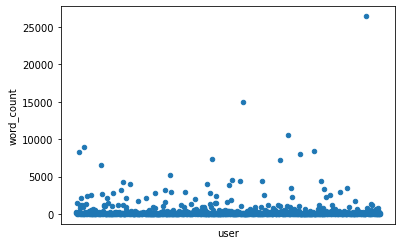

In [ ]:
userWordCount.plot.scatter(x='user', y='word_count', xticks=[])

<p><center>Nice! As we can see most users have sent less than 5000 words, while there are a few that really contributed in the Discord!</center></p>

<blockquote style="color:cadetblue";>Now let's analyze the emotions displayed for each message as we did earlier, but now in a graph form</blockquote>

Text(0, 0.5, 'Number of Messages')

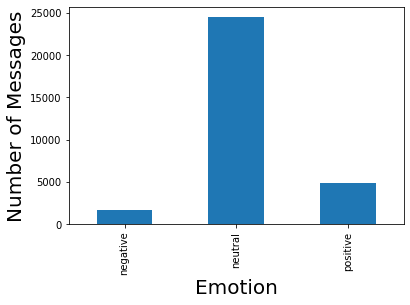

In [ ]:
emotions = df.groupby('emotion_displayed')['emotion_displayed'].count().plot.bar()
emotions.set_xlabel('Emotion', fontsize=20)
emotions.set_ylabel('Number of Messages', fontsize=20)

<p><center>Instead of the table from earlier where we couldn't compare how many messages had each emotion, we can now visually see the data and can derive the differences.</center></p>

<blockquote style="color:cadetblue";>As stated earlier, we should take this information with a grain of salt, as the library TextBlob is not perfect in sorting each message into a specific rank of either negative or positive. But it is still cool to see!</blockquote>

<p><center>Next, how about we take a look at the top most active users as we did earlier in this notebook, but this time in a graph format to visually compare how many messages each user sent.</center></p>

<p><center>We will create a variable called "frequency" for this example, and we will group by "user" based on the count of how many messages each user sent descending (from most active to least active).</center></p>
<blockquote style="color:cadetblue";>You can choose how many to display, for this purpose we will look at the top 10 users with the most messages.</blockquote>

<p><center>We can  assign the x and y axis an appropriate name. Now let's format this graph as a bar graph.</center></p>

Text(0, 0.5, 'Number of Messages')

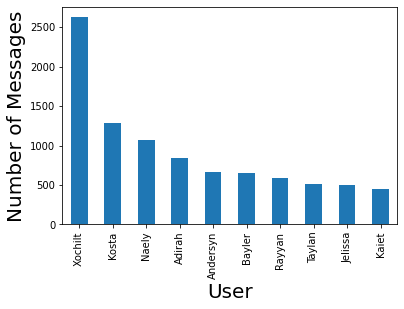

In [ ]:
frequency = df.groupby('user')['user'].count().sort_values(ascending = False)[:10].plot.bar()
frequency.set_xlabel('User', fontsize=20)
frequency.set_ylabel('Number of Messages', fontsize=20)

<p><center>This allows us to visualize our findings in a digestible format, compared to the code outputs from earlier. This way we can really see how much of a difference there is between the top users and how many messages they sent.</center></p>

<p><center>Next we will look at the day of the week compared to how many messages were sent. First let's create a variable called "dayOfWeek" which will group our data by 'day' compared to when each message was sent 'text'.</center></p>
<blockquote style="color:cadetblue";>Using the plot function, we can populate the graph we created.</blockquote>

Text(0, 0.5, 'Number of Messages')

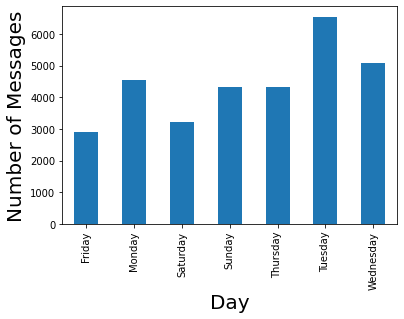

In [ ]:
dayOfWeek = df.groupby(df['day'])['text'].count().plot.bar()
dayOfWeek.set_xlabel('Day', fontsize=20)
dayOfWeek.set_ylabel('Number of Messages', fontsize=20)

<p><center>This shows us how many messages were sent compared to the day of the week.</center></p>

<blockquote style="color:cadetblue";>Seems like Tuesday has been the busiest day!</blockquote>

<p><center>We are also able to take a look at which date  had the most messages sent.</center></p>

<blockquote style="color:cadetblue";>Sorting by 'date' instead of 'day of week' will let us view the data by the date each message was sent.</blockquote>

Text(0, 0.5, 'Number of messages')

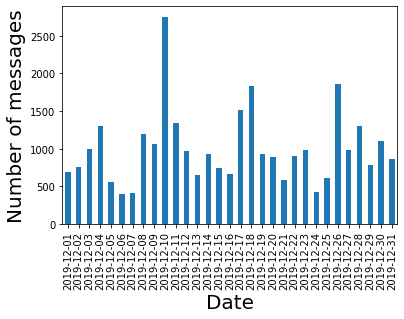

In [ ]:
graph2 = df.groupby(df['date'])['text'].count().plot.bar()
graph2.set_xlabel('Date', fontsize=20)
graph2.set_ylabel('Number of messages', fontsize=20)

<p><center>It looks like December 10th was the most engaging day for this month!</center></p>